**SETTiNGS**

In [1]:
#Select results to plot ('' will load the most recent assimilation file)
filename = '' 
filename=filename.replace('/',':')

import os
wd = '/Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/DAMP21k/' #changed
os.chdir(wd+'Holocene-code') #

# Math Functions
import numpy as np
import scipy.stats
import pandas as pd
import xarray as xr
# Plotting Functions
import matplotlib.pyplot   as plt         # Packages for making figures
import matplotlib.cm       as cm
import matplotlib.gridspec as gridspec
import cartopy.crs         as ccrs        # Packages for mapping in python
import cartopy.feature     as cfeature
import cartopy.util        as cutil
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# DA Functions
import da_utils_plotting as da_plot
import da_load_proxies
import da_load_models
import da_psms
print('packages loaded')
font = {'family': 'sans-serif', 'sans-serif': 'Lucida Grande'}

packages loaded


**LOAD DATA**

In [2]:
# If don't define a reconstruction, Get the most recent filename
if filename == '':
    filename = [f for f in os.listdir(wd+'Data/results') if os.path.isdir(os.path.join(wd+'Data/results', f))]
    filename = filename[np.argmax([os.path.getmtime(wd+'Data/results/'+f+'/'+f+'.nc') for f in filename])]
print('loading '+filename)
# Load Data
options, DAMPvals, DAMPproxy = da_plot.loadDAMPresults(wd+'Data/results/',filename)

#Define dataframe
proxy_df = pd.DataFrame(DAMPproxy['proxy_metadata'][:,[0,1,2,3,4,5,8,10,12]], columns=['dataSetName','TSid','lat','lon','seasonality_array','season','units','archive','PSM'])
#Convert lat/lons to float
proxy_df['lat'] = [np.float(x) for x in proxy_df['lat']];
proxy_df['lon'] = [np.float(x) for x in proxy_df['lon']];

#Define mapping settings
#options['assimilate_selected_region'] = [15.0, 65.0, 190.0, 360.0]
if options['assimilate_selected_region']:
    lims,proj = [], ccrs.PlateCarree()
    for x in options['assimilate_selected_region']:
        if x < 180: lims.append(x)
        else: lims.append(x-360)
    lims = np.array(lims)[[2,3,0,1]]
else:     
    lims,proj = False, ccrs.Robinson()


loading holocene_recon_2024-02-26_13:07:51.362508_annual_DAMP21ka.8000loc.5000window.500.
DA reconstruction loaded for variables:
['tas [degC]']
['LakeStatus [percentile]']
['precip [mm/day]']


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_23955/197247387.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  proxy_df['lat'] = [np.float(x) for x in proxy_df['lat']];
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_23955/197247387.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  proxy_df['lon'] = [np.floa

**CALCULATE COUNT FOR EACH TIMEBIN**

(array([ 1.,  0., 35.,  0.,  0., 58.,  0., 35.,  0.,  1.]),
 array([50., 54., 58., 62., 66., 70., 74., 78., 82., 86., 90.]),
 <BarContainer object of 10 artists>)

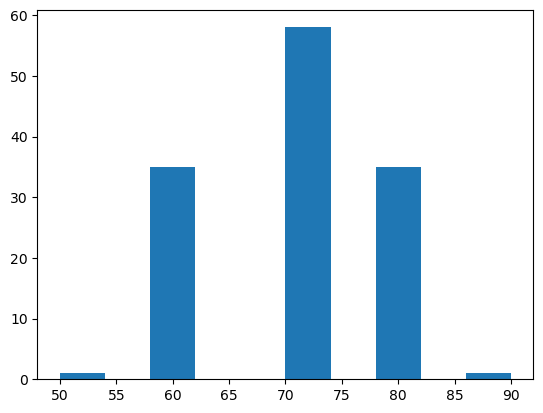

In [3]:
#a
proxy_df['agerange'],proxy_df['pctIter'],proxy_df['pctIterRound']  = np.NaN, np.NaN,np.NaN
proxy_df['pctIter'] = (np.sum(np.sum(DAMPproxy['proxies_assimilated'],axis=0)>0,axis=0)/options['number_of_i'])*100
proxy_df['agerange']= (np.sum(np.max(DAMPproxy['proxies_assimilated'],axis=1),axis=0)*options['time_resolution'])/1000
#b
ages = DAMPproxy['ages']
plt.hist((proxy_df['pctIter']))

In [4]:
print(np.unique(proxy_df['pctIter']))

[50. 60. 70. 80. 90.]


In [5]:
allproxies = np.isfinite(DAMPproxy['proxy_values']).sum(dim='proxy') 

print('minimum proxy n = ',min(allproxies.data),' at ',list(allproxies.ages[np.where(allproxies.data==min(allproxies.data))].data),' yr BP')
#minimum Holocene data density = 
print('minimum Holocene data density = ',np.round(100*float(min((allproxies/max(allproxies))[ages<=11700]).data),2),'%')
print('minimum Holocene data density = ',min(allproxies[ages<=11700]).data,'records')
allproxies

minimum proxy n =  49  at  [20249.5]  yr BP
minimum Holocene data density =  93.08 %
minimum Holocene data density =  121 records


<xarray.DataArray 'proxy_values' (ages: 42)>
array([121, 124, 121, 122, 122, 124, 126, 126, 129, 129, 130, 130, 130,
       130, 130, 130, 129, 130, 129, 129, 129, 129, 129, 129, 126, 125,
       110, 108, 106,  90,  91,  75,  74,  75,  66,  65,  63,  58,  57,
        52,  49,  50])
Coordinates:
  * ages     (ages) float32 249.5 749.5 1.25e+03 ... 2.025e+04 2.075e+04

In [6]:
s=1
u=np.unique(proxy_df['pctIter'])
proxy_df.pctIterRound = proxy_df.pctIter
proxy_df.pctIterRound[(proxy_df.pctIterRound==u[0])] = 4
proxy_df.pctIterRound[(proxy_df.pctIterRound==u[1])] = 6
proxy_df.pctIterRound[(proxy_df.pctIterRound==u[2])] = 8
proxy_df.pctIterRound[(proxy_df.pctIterRound==u[3])] = 10
proxy_df.pctIterRound[(proxy_df.pctIterRound==u[4])] = 12

proxy_df.pctIterRound[(proxy_df.pctIterRound==0)] = 1  

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_23955/1335618745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_df.pctIterRound[(proxy_df.pctIterRound==u[0])] = 4
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_23955/1335618745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proxy_df.pctIterRound[(proxy_df.pctIterRound==u[1])] = 6
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_23955/1335618745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

**PLOT**

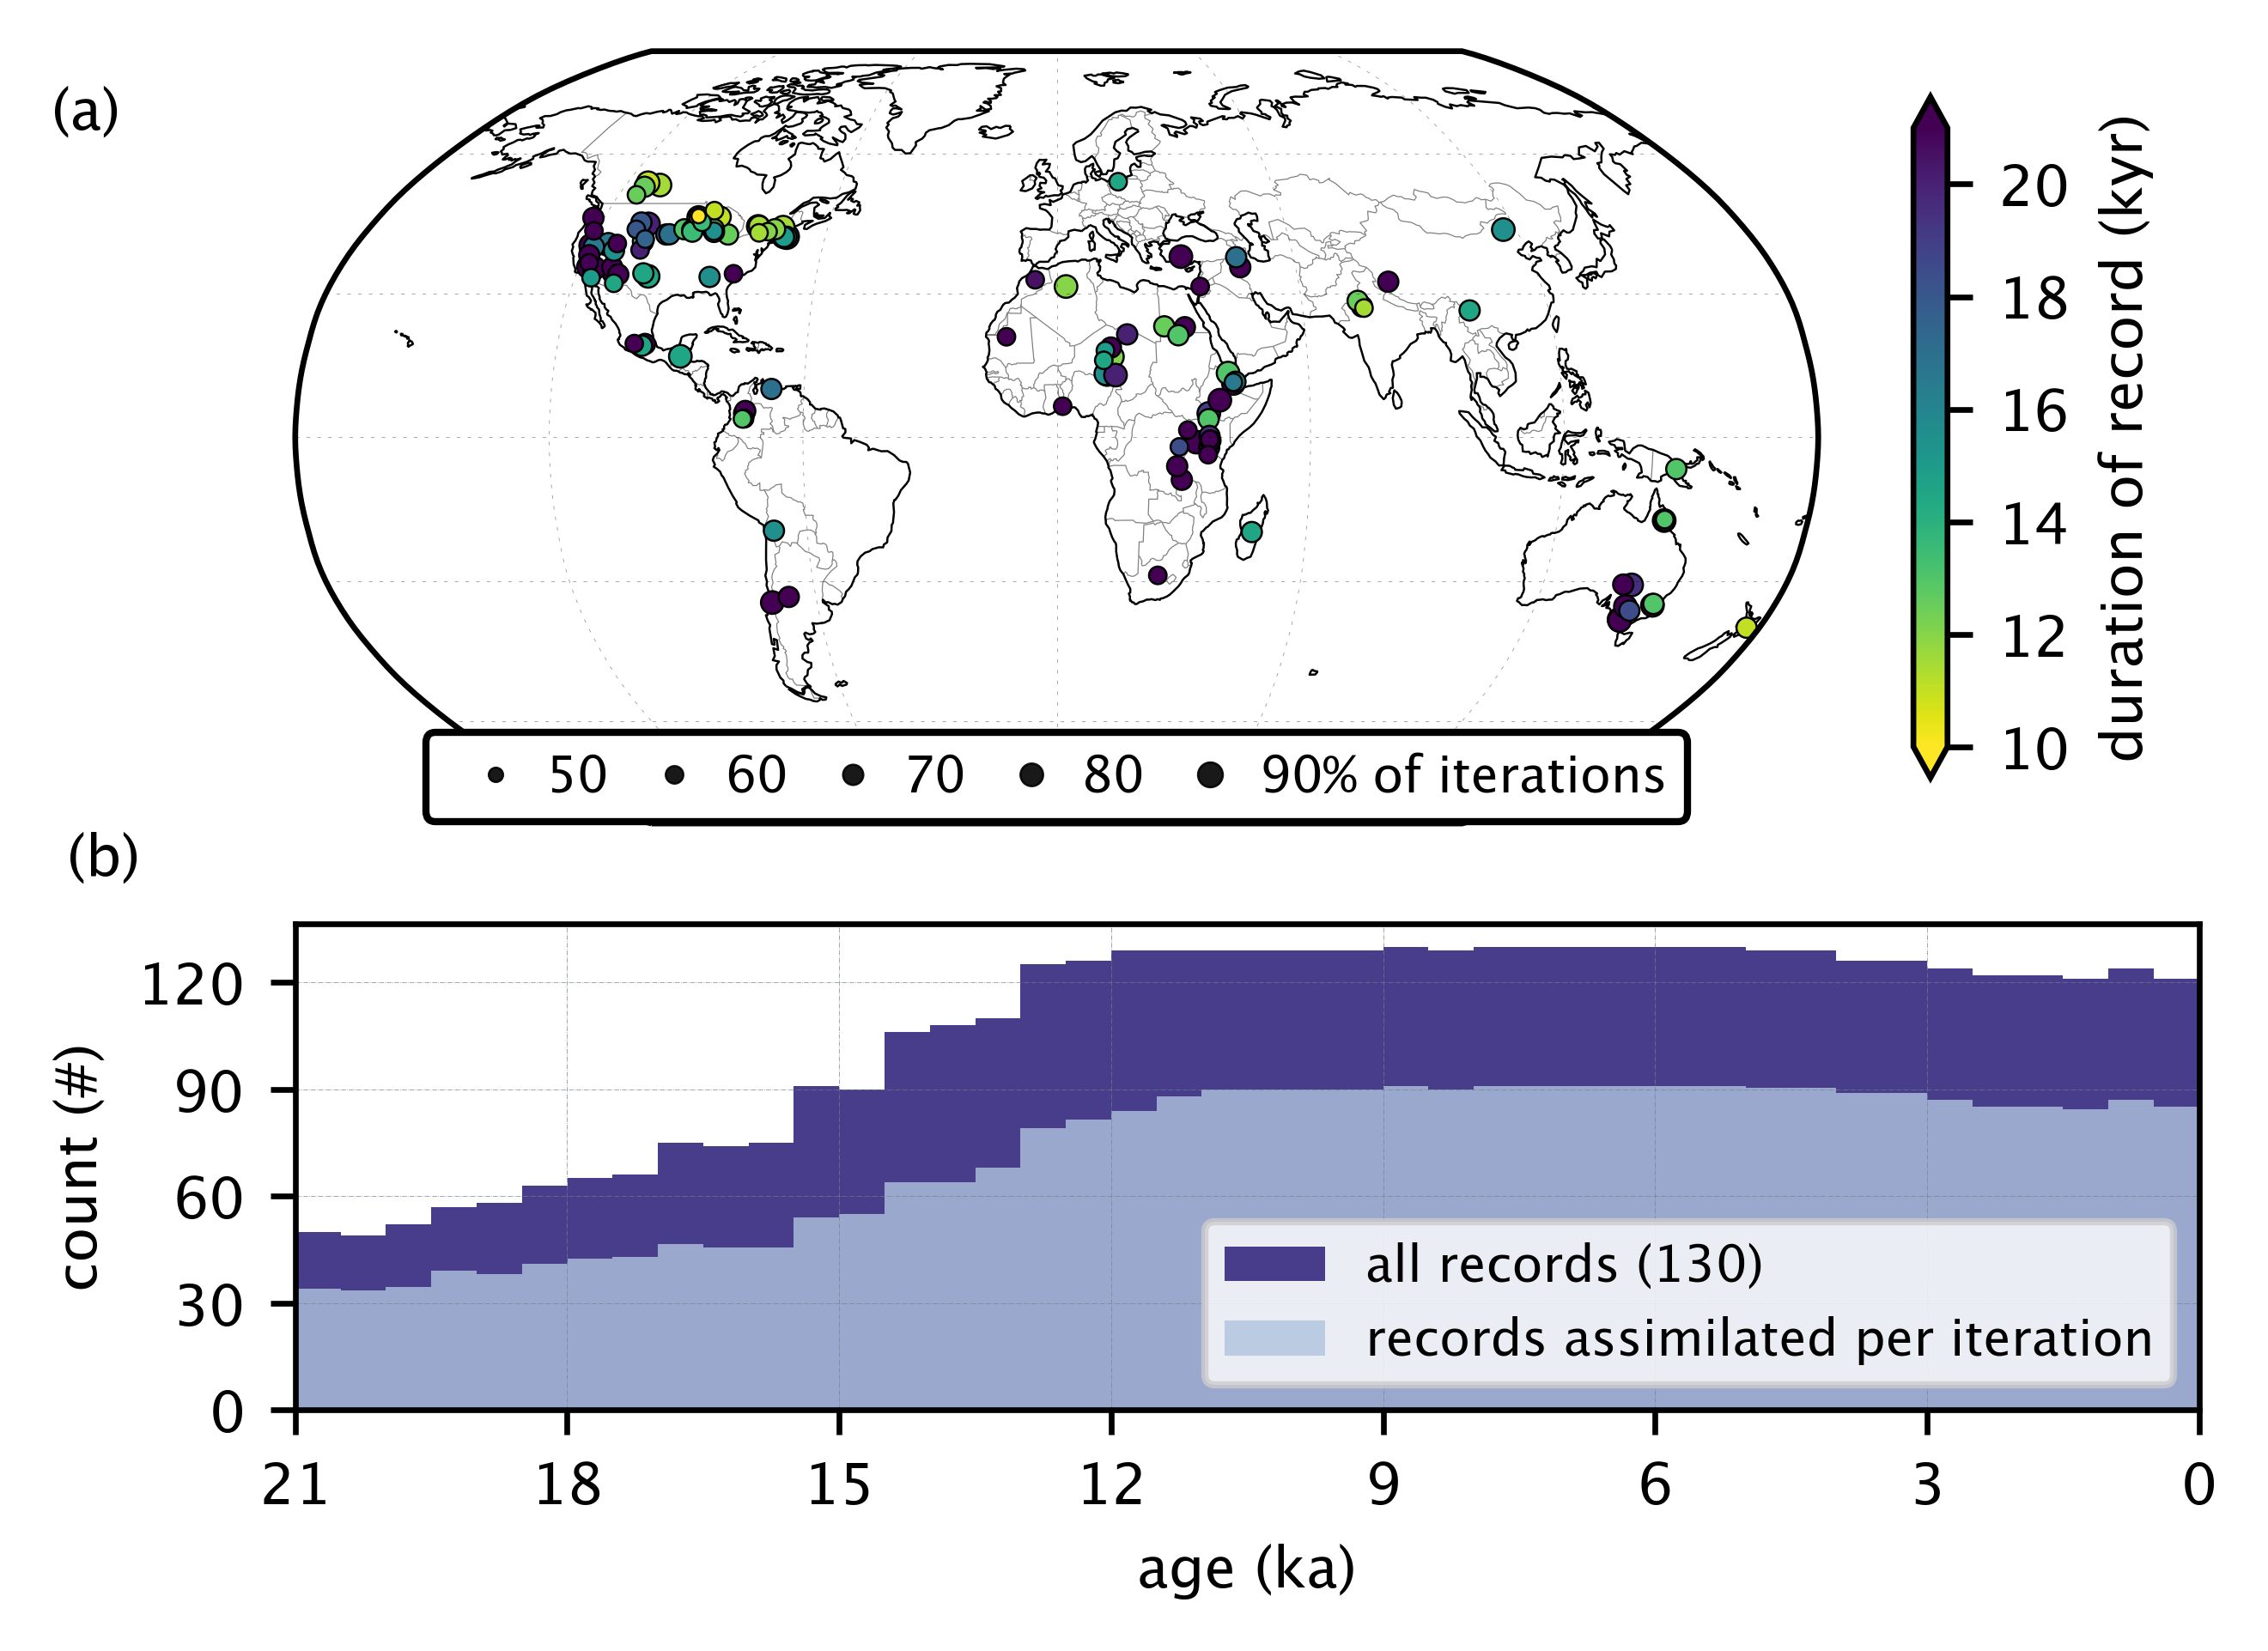

In [7]:
theme = 'default'
ustr = [str(round(x)) for x in u]
ustr[-1] = ustr[-1]+'% of iterations'
#Map proxies

#Figure settings
plt.figure(figsize=(4.5,3.5),dpi=600)
plt.style.use(theme)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rc('font', **font)
gs = gridspec.GridSpec(3,1,hspace=0)
plt.rcParams['legend.title_fontsize'] = 8

#Set Up Plot
ax1 = plt.subplot(gs[0:2],projection=ccrs.Robinson())
#ax1.set_title('Lake Proxies Used')#\n'+filename.split('_')[-1],fontsize='small',fontweight='bold')
da_plot.plotBaseMap(ax1,proj,lims)
ax2 = plt.subplot(gs[2])
ax2.bar(allproxies.ages,allproxies, width=np.diff(ages)[0],alpha=1,color='darkslateblue',label='All')

count= ages*np.NaN
for i,psm in enumerate(np.unique(proxy_df['PSM'])):
    idx = np.array((proxy_df['PSM']==psm))
    #Map Proxies
    df = proxy_df.loc[idx]
    sorti = np.argsort(np.abs(df['pctIter'])).values[::-1]
    df = df.loc[sorti]
    p=ax1.scatter(df.lon,df.lat,c=df.agerange,s=df.pctIterRound,vmin=10,vmax=21,
                  ec='k',linewidth=0.3,cmap='viridis_r',label=psm.split('_')[1],
                  transform=ccrs.PlateCarree(),zorder=2)
    cbar=plt.colorbar(p,ax=ax1,use_gridspec=True,extend='both',shrink=0.7,aspect=20,ticks=range(10,21,2))
    cbar.ax.tick_params(labelsize=8) 
    cbar.set_label(label='duration of record (kyr)',size=8,position='left')
    n=len(np.unique(df.pctIterRound))
    f= (lambda s: (df.pctIterRound))
    handles, labels = p.legend_elements(prop="sizes", alpha=0.9)     
    ax1.legend(handles=handles,labels=ustr,ncol=5,loc='lower center',fontsize=7,bbox_to_anchor=(0.5, -0.03),#scatterpoints=3,
            columnspacing=0.3,handletextpad=0,framealpha=1,edgecolor='k',
            )
    #
    #Time density
    countNew = np.median(np.sum(DAMPproxy['proxies_assimilated'][:,:,idx],axis=2),axis=1)
    if i == 0: ax2.bar(ages, countNew,               width=np.diff(ages)[0],color='lightsteelblue',alpha=0.8,label=psm.split('_')[1]+' ('+str(df.shape[0])+')')
    else:      ax2.bar(ages, countNew, bottom=count, width=np.diff(ages)[0],color='cornflowerblue',alpha=0.9,label=psm.split('_')[1]+' ('+str(df.shape[0])+')')
    count+=countNew
    #Adjust plot darkgrey
    ax2.grid(color='slategrey', linestyle='-.', linewidth=0.1,alpha=0.8)
    ax2.set_xlim(max(ages),min(ages)); ax2.xaxis.set_ticks((np.linspace(0,21000,8))); ax2.set_xticklabels([int(x) for x in (np.linspace(0,21,8))],size=8)
    ax2.yaxis.set_ticks((range(0,140,30)),size=8)
    ax2.set_yticklabels((range(0,140,30)),size=8)
    ax2.set_ylabel('count (#)',size=8)
    ax2.set_xlabel('age (ka)',size=8)
    ax2.legend(labels=['all records ('+str(np.max(allproxies.data))+')','records assimilated per iteration'],fontsize=7,loc='lower right')
ax1.text(-0.16, 0.9, '(a)', transform=ax1.transAxes,  size=8)
ax2.text(-0.12, 1.1, '(b)', transform=ax2.transAxes,  size=8)

plt.tight_layout()
plt.savefig(wd+'Data/results/'+filename+'/'+'Fig1_ProxiesUsed.png', dpi=600, bbox_inches ="tight")

In [8]:
optionsValidate = options

optionsValidate['assimilate_selected_HCproxies'] = ['CalibratedPollen']
optionsValidate['proxy_datasets_to_assimilate'] = ['hydro12k']
optionsValidate['version_hydro12k'] = '0_7_0'
optionsValidate['assimilate_selected_seasons'] = ['annual']

proxy_ts,collection_all = da_load_proxies.load_proxies(options)
proxy_pollen = da_load_proxies.process_proxies(proxy_ts,collection_all,options)

proxy_pollen_df =  pd.DataFrame(proxy_pollen['metadata'][:,[0,1,2,3,5,8,10,12]], 
                                columns=['dataSetName','TSid','lat','lon','season','units','archive','PSM'])

proxy_pollen_df['lat'] = proxy_pollen['lats']
proxy_pollen_df['lon'] = proxy_pollen['lons']

Loading proxy dataset 1/1: hydro12k
"seasonality" key not found for index 14272
Number of hydro12k records selected: 350

=== Processing proxy data. This can take a few minutes. Please wait. ===
Proxy 0 PSM selected: get_precip | Lake pollen P mm/a
Proxy 1 PSM selected: get_precip | Lake pollen P mm/a
Proxy 2 PSM selected: get_precip | Lake pollen P mm/a
Proxy 3 PSM selected: get_precip | Lake pollen P mm/a
Proxy 4 PSM selected: get_precip | Lake pollen P mm/a
Proxy 5 PSM selected: get_precip | Lake pollen P mm/a
Proxy 6 PSM selected: get_precip | Lake pollen P mm/a
Proxy 7 PSM selected: get_precip | River pollen P mm/a
Proxy 8 PSM selected: get_precip | Lake pollen P mm/a
Proxy 9 PSM selected: get_precip | Lake pollen P mm/a
Proxy 10 PSM selected: get_precip | Lake pollen P mm/a
Proxy 11 PSM selected: get_precip | Peat pollen P mm/a
Proxy 12 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 13 PSM selected: get_precip | Lake pollen P mm/a
Proxy 14 PSM selected: get_precip | 

/Users/chrishancock/opt/anaconda3/envs/DAMP12k/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/DAMP21k/Holocene-code/da_load_proxies.py:375: RuntimeWarning: Mean of empty slice
  res_avg              = np.nanmean(proxy_res_interp[ind_selected])


Proxy 38 PSM selected: get_precip | Lake pollen P mm/a
Proxy 39 PSM selected: get_precip | Bog pollen P mm/a
Proxy 40 PSM selected: get_precip | Peat pollen P mm/a
Proxy 41 PSM selected: get_precip | Fluvial pollen P mm/a
Proxy 42 PSM selected: get_precip | Lake pollen P mm/a
Proxy 43 PSM selected: get_precip | Lake pollen P mm/a
Proxy 44 PSM selected: get_precip | Lake pollen P mm/a
Proxy 45 PSM selected: get_precip | Lake pollen P mm/a
Proxy 46 PSM selected: get_precip | Lake pollen P mm/a
Proxy 47 PSM selected: get_precip | Peat pollen P mm/a
Proxy 48 PSM selected: get_precip | Peat pollen P mm/a
Proxy 49 PSM selected: get_precip | Peat pollen P mm/a
Proxy 50 PSM selected: get_precip | Peat pollen P mm/a
Proxy 51 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 52 PSM selected: get_precip | Lake pollen P mm/a
Proxy 53 PSM selected: get_precip | Lake pollen P mm/a
Proxy 54 PSM selected: get_precip | Lake pollen P mm/a
Proxy 55 PSM selected: get_precip | Lake pollen P mm/a


Proxy 188 PSM selected: get_precip | Lake pollen P mm/a
Proxy 189 PSM selected: get_precip | Lake pollen P mm/a
Proxy 190 PSM selected: get_precip | Peat pollen P mm/a
Proxy 191 PSM selected: get_precip | Peat pollen P mm/a
Proxy 192 PSM selected: get_precip | Lake pollen P mm/a
Proxy 193 PSM selected: get_precip | Lake pollen P mm/a
Proxy 194 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 195 PSM selected: get_precip | Peat pollen P mm/a
Proxy 196 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 197 PSM selected: get_precip | Peat pollen P mm/a
Proxy 198 PSM selected: get_precip | Bog pollen P mm/a
Proxy 199 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 200 PSM selected: get_precip | Peat pollen P mm/a
Proxy 201 PSM selected: get_precip | Creek pollen P mm/a
Proxy 202 PSM selected: get_precip | Lake pollen P mm/a
Proxy 203 PSM selected: get_precip | Lake pollen P mm/a
Proxy 204 PSM selected: get_precip | Ocean pollen P mm/a
Proxy 205 PSM selected:

Proxy 342 PSM selected: get_precip | Lake pollen P mm/a
Proxy 343 PSM selected: get_precip | Lake pollen P mm/a
Proxy 344 PSM selected: get_precip | Lake pollen P mm/a
Proxy 345 PSM selected: get_precip | Lake pollen P mm/a
Proxy 346 PSM selected: get_precip | Lake pollen P mm/a
Proxy 347 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 348 PSM selected: get_precip | Peat pollen P mm/a
Proxy 349 PSM selected: get_precip | Lake pollen P mm/a

=== PROXY DATA LOADED ===
Proxy datasets loaded (n=1):['hydro12k']
Proxies loaded        (n=350)
---
Proxies without data in reference period (n=0)
Proxies without uncertainty value        (n=0). Set to nan
---
Data stored in dictionary "proxy_data", with keys and dimensions:
       values_binned (350, 42)      
   resolution_binned (350, 42)      
            metadata (350, 13)      
                lats (350,)         
                lons (350,)         
         uncertainty (350,)         
         archivetype (350,)         
       

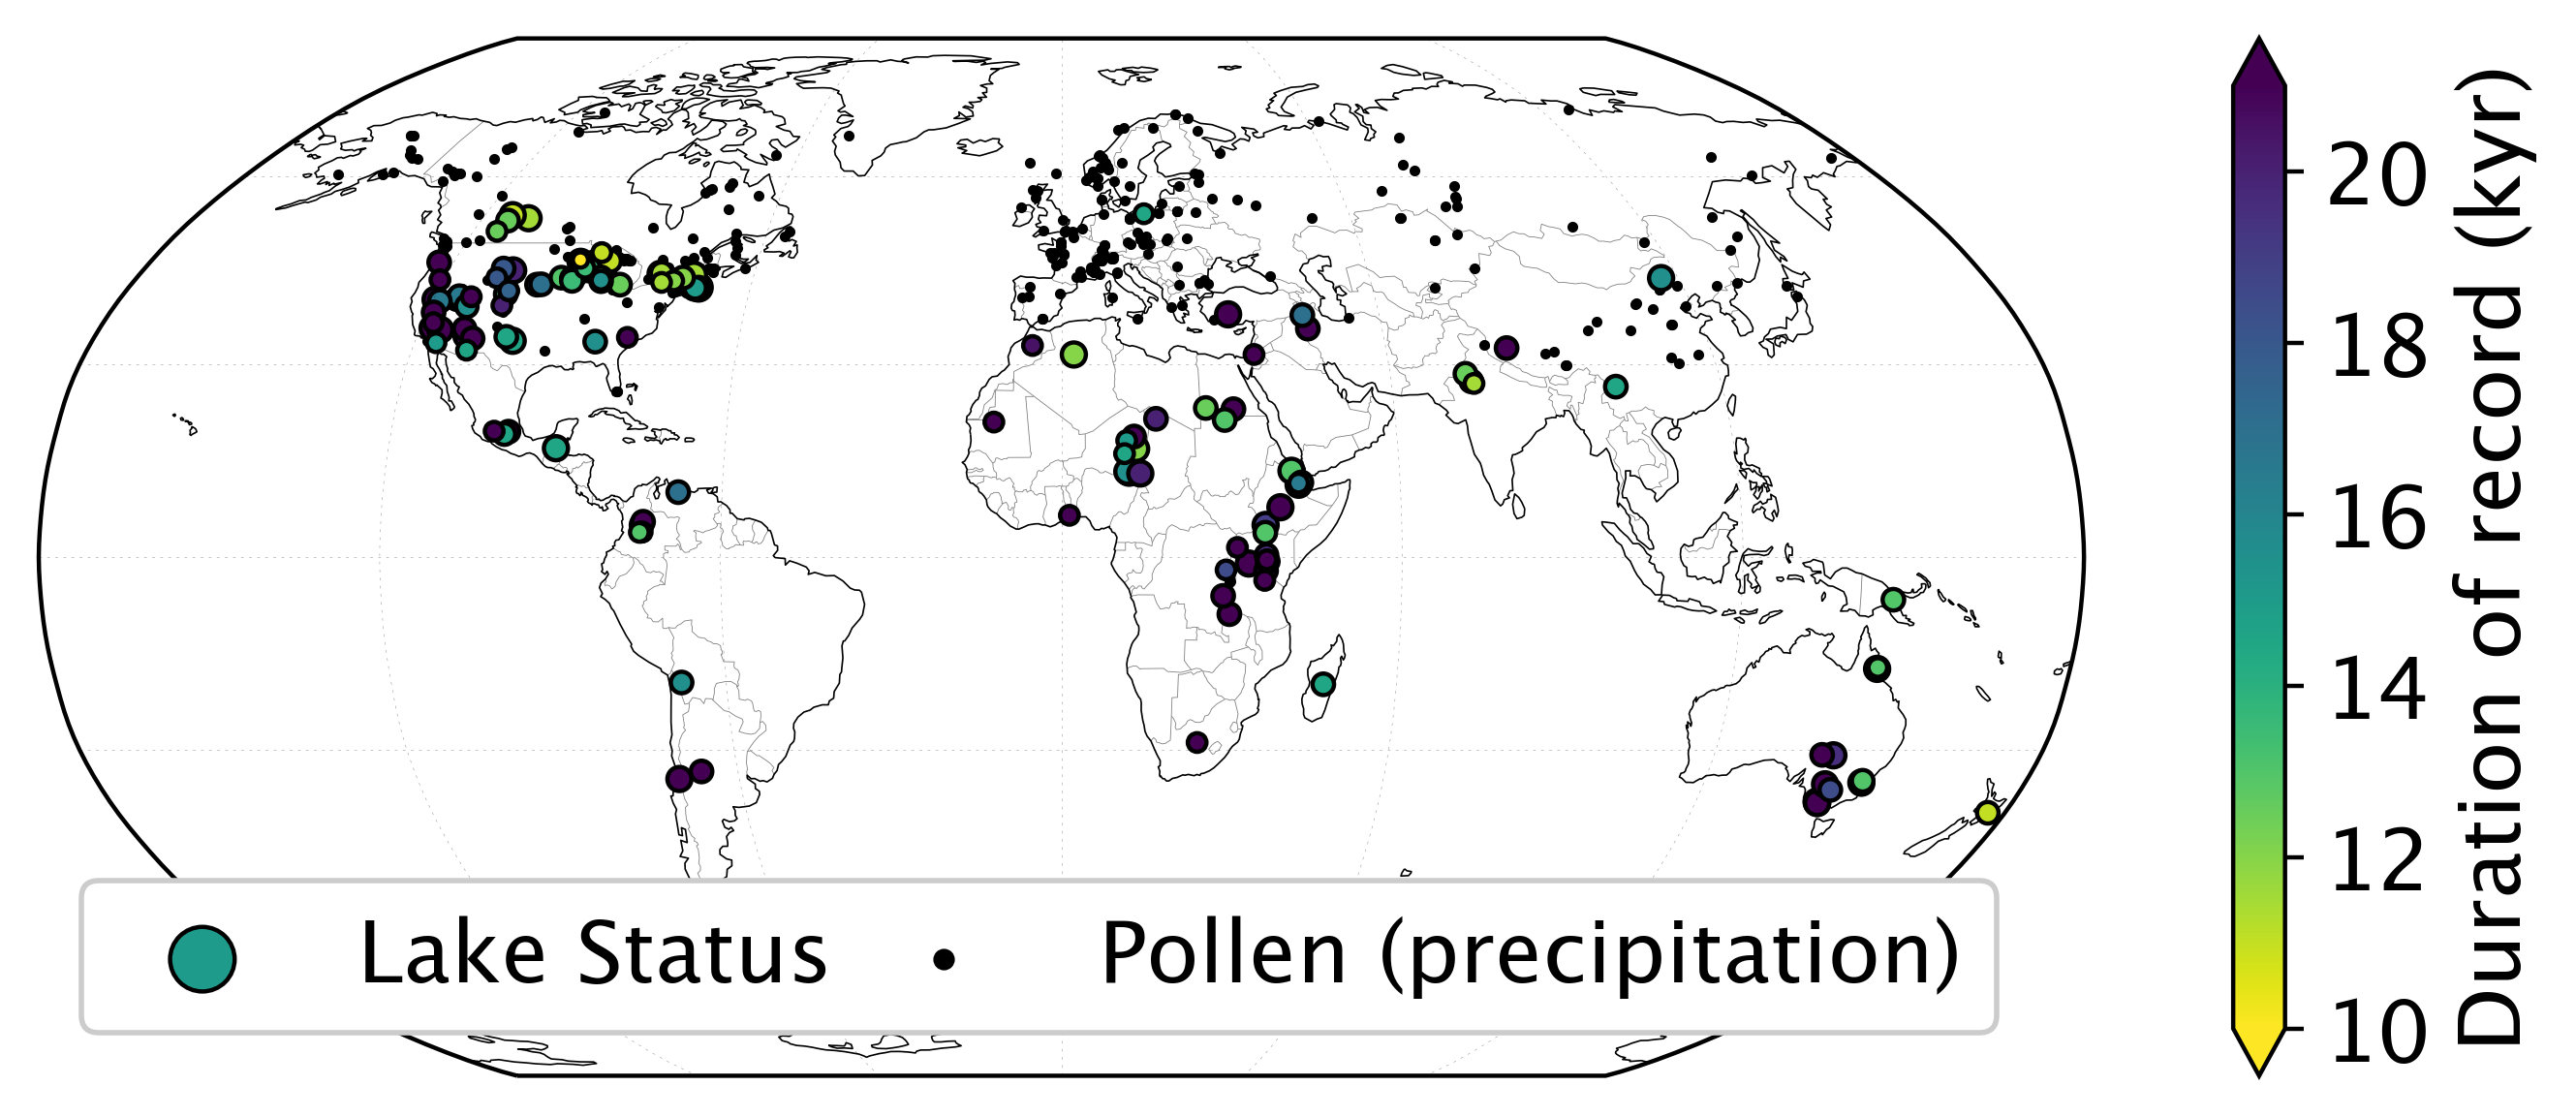

In [9]:
theme = 'default'
#FOR POSTER
#Map proxies

#Figure settings
plt.figure(figsize=(8,3),dpi=400)
plt.style.use(theme)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rc('font', **font)
gs = gridspec.GridSpec(2,1,hspace=0)
plt.rcParams['legend.title_fontsize'] = 16

#Set Up Plot
ax1 = plt.subplot(gs[:,:],projection=ccrs.Robinson())
#ax1.set_title('Lake Proxies Used')#\n'+filename.split('_')[-1],fontsize='small',fontweight='bold')
da_plot.plotBaseMap(ax1,proj,lims)
#ax2 = plt.subplot(gs[2])

count= ages*np.NaN
for i,psm in enumerate(np.unique(proxy_df['PSM'])):
    idx = np.array((proxy_df['PSM']==psm))
    #Map Proxies
    df = proxy_df.loc[idx]
    sorti = np.argsort(np.abs(df['pctIter'])).values[::-1]
    df = df.loc[sorti]
    p=ax1.scatter(df.lon,df.lat,c=df.agerange,s=df.pctIterRound*2,vmin=10,vmax=21,
                  ec='k',linewidth=0.8,cmap='viridis_r',label='Lake Status',
                  transform=ccrs.PlateCarree(),zorder=2)
    ax1.scatter(proxy_pollen_df['lon'] ,proxy_pollen_df['lat'],s=1,c='k',transform=ccrs.PlateCarree(),
                label='Pollen (precipitation)')
    cbar=plt.colorbar(p,ax=ax1,use_gridspec=True,extend='both',shrink=1,aspect=20,ticks=range(10,21,2))
    cbar.ax.tick_params(labelsize=16) 
    cbar.set_label(label='Duration of record (kyr)',size=16,position='left')
    #n=len(np.unique(df.pctIterRound))
    #f= (lambda s: (df.pctIterRound)**3)
    #handles, labels = p.legend_elements(prop="sizes", alpha=0.9)     
    #labels = ['≤45','46-55','56-65','66-75','>75% of iterations']  
    ax1.legend(fontsize=16,loc='lower left',ncol=2,framealpha=1,columnspacing=0.3,markerscale=3) 
    #handles=handles,labels=labels,ncol=5,loc='lower center',fontsize=16,bbox_to_anchor=(0.5, -0.03),#scatterpoints=3,
     #       columnspacing=0.3,handletextpad=0,framealpha=1,edgecolor='k',
      #      )

#ax1.text(-0.16, 0.9, '(a)', transform=ax1.transAxes,  size=8)

plt.tight_layout()
#plt.savefig(wd+'Data/results/'+filename+'/'+'Fig1_ProxiesUsed.png', dpi=400, bbox_inches ="tight")